In [46]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
cifar10.data_path = "data/CIFAR-10/"

In [21]:
#cifar10.maybe_download_and_extract()

In [12]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [15]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [22]:
x_images_training=images_train[:, :, :, 0]
x_train=x_images_training.reshape((50000, 32*32))
y_train=cls_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


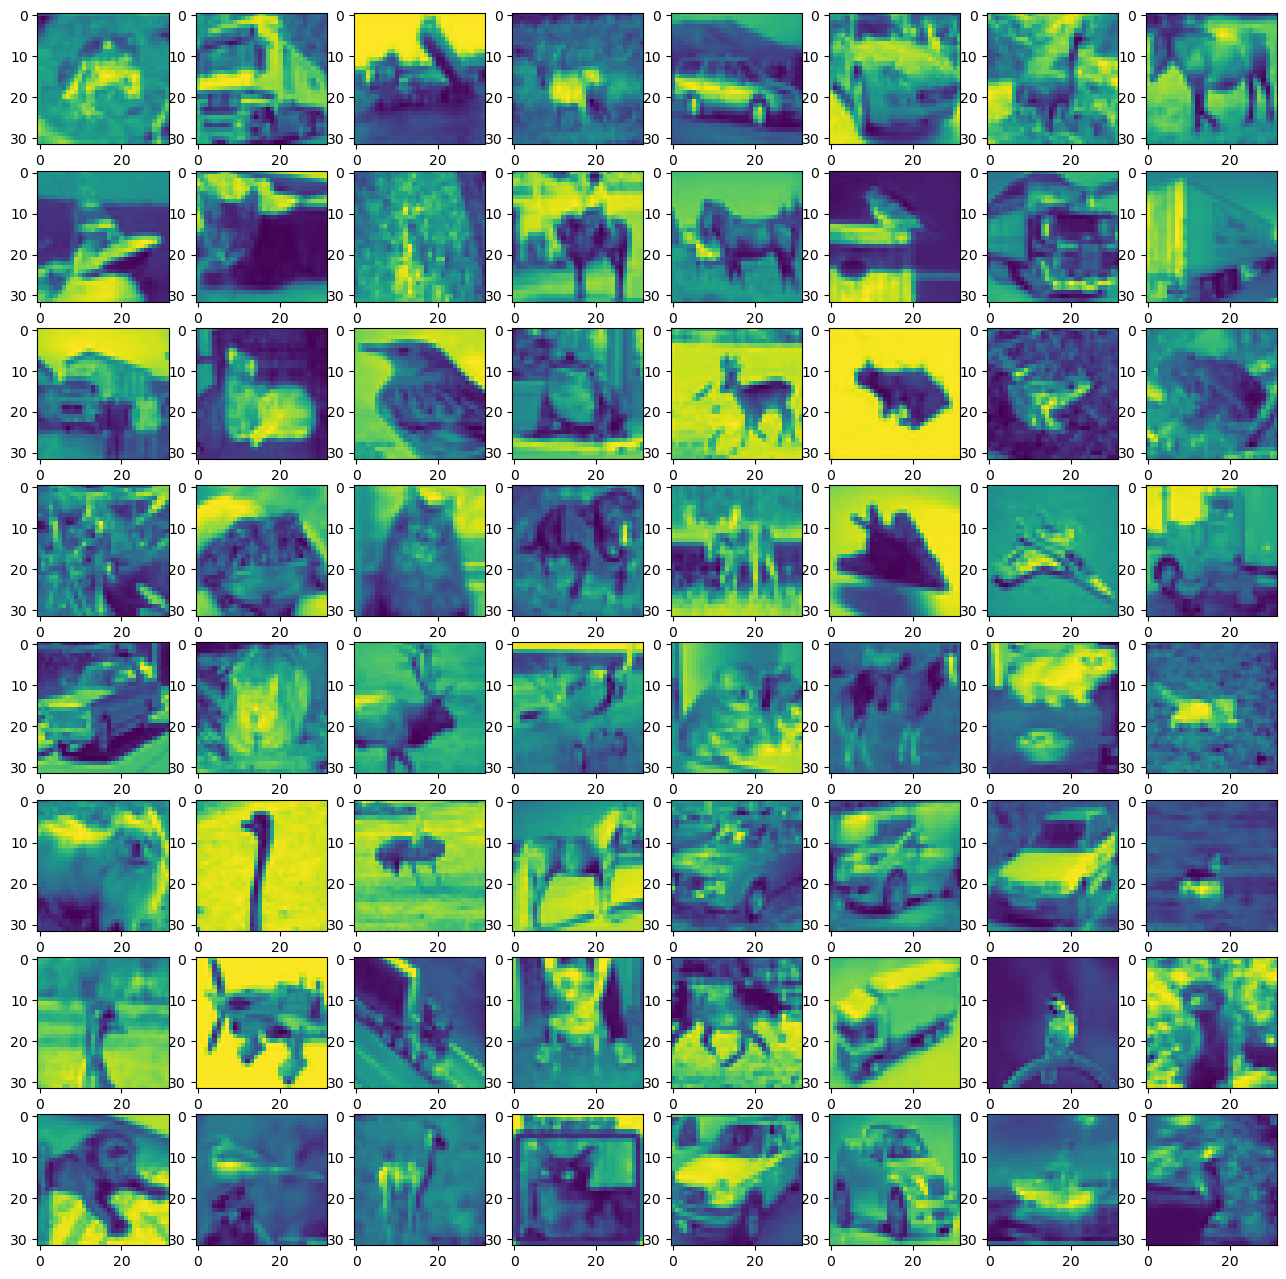

In [23]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(x_images_training[i])
plt.show()

In [25]:
pca=PCA(whiten=True)
pca.fit(x_train)

PCA(whiten=True)

In [27]:
k=0
# size=len(pca.explained_variance_)
total=sum(pca.explained_variance_)
cSum=0
while(cSum/total<0.99):
    cSum+=pca.explained_variance_[k]
    k=k+1
k

429

In [37]:
pca_cf=PCA(n_components=k,whiten=True)
train_transformed_data=pca.fit_transform(x_train)

In [38]:
train_transformed_data.shape

(50000, 1024)

In [39]:
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

(10000, 32, 32, 3)
(10000,)
(10000, 10)


In [40]:
x_images_test=images_test[:, :, :, 0]
x_test=x_images_test.reshape((10000, 32*32))
y_test=cls_test
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)

(10000, 1024)
(10000,)
(10000, 32, 32)


In [42]:
x_test_transformed=pca_cf.fit_transform(x_test)
x_test_transformed.shape

(10000, 429)

In [44]:
SVC()

SVC()

In [47]:
clf1=RandomForestClassifier(n_estimators=429, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)
clf2=LogisticRegression(n_jobs=-1, multi_class="auto")
clf3=KNeighborsClassifier(n_jobs=-1)
clf4=SVC(tol=0.0001)

In [48]:
clf1.fit(train_transformed_data, y_train)
print("Done")
clf2.fit(train_transformed_data, y_train)
print("Done")
clf3.fit(train_transformed_data, y_train)
print("Done")
clf4.fit(train_transformed_data, y_train)
print("Done")

Done
Done
Done


In [ ]:
y_test_predicted1=clf1.predict(x_test_transformed)
y_test_predicted2=clf2.predict(x_test_transformed)
y_test_predicted3=clf3.predict(x_test_transformed)
y_test_predicted4=clf4.predict(x_test_transformed)